# Installing dependencies

In [1]:
import random
import gc
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import ticker
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import keras
from keras import layers
from keras import models
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Activation, Dropout
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers, applications
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras.utils import to_categorical

import efficientnet
from efficientnet import EfficientNetB3
from skimage.transform import resize

Using TensorFlow backend.
/opt/infilect/dev/envs/env_eff/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/infilect/dev/envs/env_eff/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/infilect/dev/envs/env_eff/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/infilect/dev/envs/env_eff/l

In [ ]:
!unzip Image_2.zip


In [2]:
#Function to resize the images to required size and generate labels(depending on the name of file) 
def read_and_process_image(list_of_images):
    """
    Returns two arrays: 
        X is an array of resized images
        y is an array of labels
    """
    X = [] # images
    y = [] # labels
    
    for image in list_of_images:
        
        fg=cv2.imread(image,cv2.IMREAD_COLOR)
        ff=cv2.resize(fg,(300,300),interpolation=cv2.INTER_CUBIC)
        X.append(ff)
        if 'category 1' in image:
            y.append(0)
        elif 'category 2' in image:
            y.append(1)
        elif 'category 3' in image:
            y.append(2)
        elif 'category 4' in image:
            y.append(3)    
          
    return X, y

#Get data 

In [3]:
train_dir_1 = 'Image_2/Input/Dataset/train/category 1'
train_dir_2 = 'Image_2/Input/Dataset/train/category 2'
train_dir_3 = 'Image_2/Input/Dataset/train/category 3'
train_dir_4 = 'Image_2/Input/Dataset/train/category 4'
test_dir = 'Image_2/Input/Dataset/test'

train_cat1 = ['Image_2/Input/Dataset/train/category 1/{}'.format(i) for i in os.listdir(train_dir_1) if 'category 1' in i] 
train_cat2 = ['Image_2/Input/Dataset/train/category 2/{}'.format(i) for i in os.listdir(train_dir_2) if 'category 2' in i] 
train_cat3 = ['Image_2/Input/Dataset/train/category 3/{}'.format(i) for i in os.listdir(train_dir_3) if 'category 3' in i] 
train_cat4 = ['Image_2/Input/Dataset/train/category 4/{}'.format(i) for i in os.listdir(train_dir_4) if 'category 4' in i] 
test_imgs = ['Image_2/Input/Dataset/test/{}'.format(i) for i in os.listdir(test_dir)]

train_imgs = train_cat1 + train_cat2+train_cat3+train_cat4

# random.shuffle(train_imgs)
random.shuffle(test_imgs)

del train_cat1
del train_cat2
del train_cat3
del train_cat4
gc.collect()

img_size=300
batch_size=32
nrows = ncolumns=img_size
channels = 3  

X,y =read_and_process_image(train_imgs)  

X_test,y_test =read_and_process_image(test_imgs)
x = np.array(X_test)


X = np.array(X)
y = np.array(y)
print("Shape of train images is:", X.shape)
print("Shape of labels is:", y.shape)

# del train_imgs
gc.collect()

## Data to feed the model (training required format) 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=2)



##Converting shape from (1,) to (4,) -as required for softmax
y_train = to_categorical(y_train) 
y_val = to_categorical(y_val)


train_datagen=ImageDataGenerator(rescale=1./255,   #Scale the image between 0 and 1
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(X_train, y=y_train,batch_size=batch_size,shuffle=True)

val_generator = val_datagen.flow(X_val, y=y_val, batch_size=batch_size,shuffle=True)
######Ignore ---error: OpenCV(4.1.0) /io/opencv/modules/imgproc/src/resize.cpp:3718: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Shape of train images is: (440, 300, 300, 3)
Shape of labels is: (440,)


# Visualise dataset

0

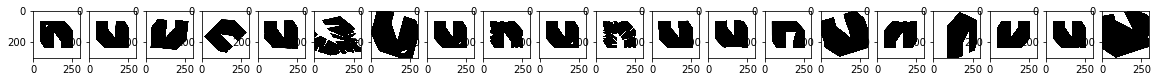

In [4]:
plt.figure(figsize=(20,10))
columns = 20
for i in range(columns):
    plt.subplot(5 / columns + 1, columns, i + 1)
    plt.imshow(X[i])
    
del X
gc.collect()    

34981

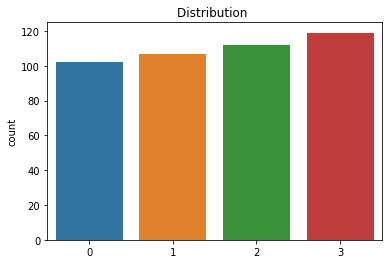

In [5]:
sns.countplot(y)
plt.title('Distribution ')
del y
gc.collect()    

# Adding new layers


In [ ]:
## Download Model weights
b3_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
b3_model.trainable = False

model = models.Sequential()
model.add(b3_model)
model.add(layers.Flatten())
model.add(layers.Dense(2304, activation='relu'))
model.add(layers.Dense(2304, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

# Training

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-6), metrics=['acc'])

#Saving checkpoints only if val_loss improve and early stopping if val_loss doesn't improve for 50 epochs
checkpoint = ModelCheckpoint("path to save/model_keras.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=50, verbose=1, mode='auto')

ntrain = len(X_train)
nval = len(X_val)
print(ntrain,nval)

history = model.fit_generator(train_generator,
                              steps_per_epoch=ntrain // batch_size,
                              epochs=100,
                              validation_data=val_generator,
                              callbacks = [checkpoint, early],
                              validation_steps=nval // batch_size)

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)


def smooth_plot(points, factor=0.7):
    smooth_pts = []
    for point in points:
        if smooth_pts:
            previous = smooth_pts[-1]
            smooth_pts.append(previous * factor + point * (1 - factor))
        else:
            smooth_pts.append(point)
    return smooth_pts
  
#Plot figure
plt.plot(epochs, smooth_plot(acc), 'b', label='Training accurarcy')
plt.plot(epochs, smooth_plot(val_acc), 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()
plt.show()  

# Testing

In [ ]:
from keras.models import load_model
model=load_model("path to/model_keras.h5")


i = 0
columns = len(x)
print(len(x))
text_labels = []
plt.figure(figsize=(30,20))
for batch in test_datagen.flow(x, batch_size=1):
    pred = model.predict(batch)
    arr=pred[0]
    maxE=np.amax(arr)
    res = np.where(arr == np.amax(arr))
    res=res[0]
    if res == 0:
        text_labels.append('1')
    elif res ==1:
        text_labels.append('2')
    elif res ==2:
        text_labels.append('3')
    elif res ==3:
        text_labels.append('4')    
    plt.subplot(6, 5, i + 1)
    plt.title('Category' + text_labels[i])
    imgplot = plt.imshow(batch[0])
    i += 1
    if i % columns == 0:
        break
plt.show()